In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [85]:
df = pd.read_csv('metrics_h264_dec.csv')
df.head()

,Total Lakage,Runtime Dynamic,CPI,Energy,EDP,label
0,0.49407,0.63179,1.416044,1.594267,2.257553,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
1,0.49407,0.63201,1.416111,1.594654,2.258207,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
2,0.49407,0.63179,1.416088,1.594317,2.257693,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
3,0.49407,0.63179,1.416027,1.594248,2.257498,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
4,0.49411,0.74197,0.999090,1.234955,1.233831,l3_cache=1MB_l2_cache=128kB_decode_width=2_num...


In [86]:
print('Best CPI: ', df['CPI'].min(), 'Index: ', df['CPI'].idxmin() - 1)

Best CPI:  0.890047 Index:  222


In [87]:
l3_cache = ['1MB', '2MB', '4MB', '8MB']
l2_cache = ['128kB', '256kB', '512kB', '1MB']
decode_width = [1, 2, 4, 8]
num_fu_intALU = [2, 4, 8, 16]

In [88]:
def polinomial_func(x_step, x, y, deg=2):
    p = np.polyfit(x, y, deg)
    z = np.poly1d(p)
    curve = z(x_step)
    return curve

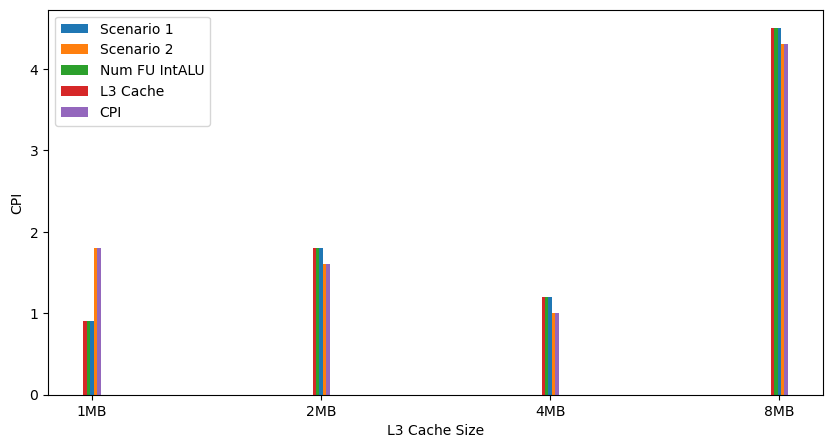

In [89]:
a = [0.9, 1.8, 1.2, 4.5]
b = [1.8, 1.6, 1.0, 4.3]
c = [0.9, 1.8, 1.2, 4.5]
d = [1.8, 1.6, 1.0, 4.3]
e = [0.9, 1.8, 1.2, 4.5]
x = np.arange(len(l3_cache))
plt.figure(figsize=(10, 5))
plt.bar(x, c, width=0.015, label='Scenario 1')
plt.bar(x+0.015, d, width=0.015, label='Scenario 2')
plt.bar(x-0.015, e, width=0.015, label='Num FU IntALU')
plt.bar(x-0.03, a, width=0.015, label='L3 Cache')
plt.bar(x+0.03, b, width=0.015, label='CPI')
plt.xlabel('L3 Cache Size')
plt.ylabel('CPI')
plt.xticks(x, l3_cache)
plt.legend()
plt.show()